In [5]:
#Wczytanie bibliotek
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
from operator import itemgetter
import seaborn as sns
import numpy as np
import ast
import random
import matplotlib.colors as mcolors

In [6]:
#Wczytanie danych

import os
# Ścieżka do katalogu z plikami
os.chdir("C:/Users/szymo/Documents/Sieci")

# Dane edges (czyli relacje współpracy między artystami)
edges = pd.read_csv('edges.csv')

# Dane nodes (czyli dodatkowe dane o artystach)
nodes = pd.read_csv('nodes.csv')


In [7]:
# Budowa grafu
G = nx.Graph()
G.add_edges_from(zip(edges['id_0'], edges['id_1']))

# Podstawowe informacje o grafie
print(f"Liczba węzłów: {G.number_of_nodes()}")
print(f"Liczba krawędzi: {G.number_of_edges()}")


Liczba węzłów: 153327
Liczba krawędzi: 300386


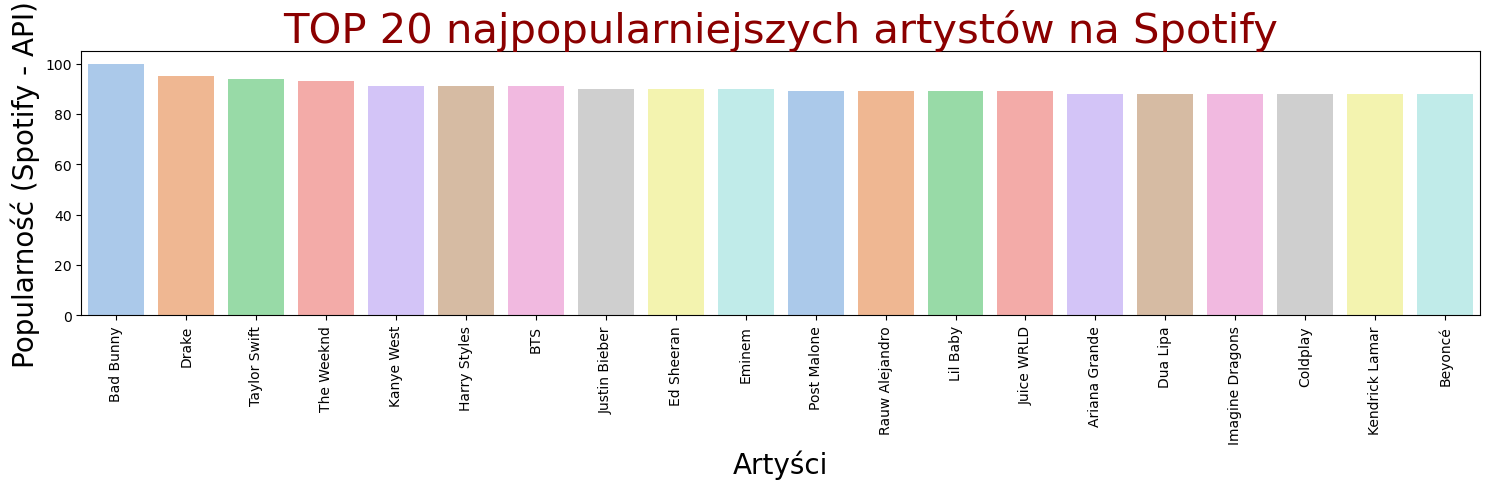

In [8]:
# Sortowanie artystów po popularności
top_artists = nodes.sort_values(by='popularity', ascending=False).head(20)

# Wykres
plt.figure(figsize=(15, 5))
sns.barplot(
    x='name',
    y='popularity',
    hue='name',
    data=top_artists,
    palette="pastel",
    dodge=False,
    legend=False
)


plt.xlabel('Artyści', size=20)
plt.ylabel('Popularność (Spotify - API)', size=20)
plt.title('TOP 20 najpopularniejszych artystów na Spotify', color='darkred', size=30)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [9]:
# Zamiana nazwy kolumn - czytelność
edges = edges.rename(columns={'id_0': 'artist_1', 'id_1': 'artist_2'})

# Grupowanie jeśli zdarzyły się duplikaty:
krawedzie_df = edges.groupby(['artist_1', 'artist_2']).size().reset_index(name='weight')

# Podgląd wyników
print(krawedzie_df.head())

# Suma par z więcej niż 1 współpraca:
print(krawedzie_df['weight'].value_counts())

# Filtrowanie: wszystkie pary nawet 1 raz
krawedzie_df_all = krawedzie_df.copy()

# Filtrowanie: tylko pary z co najmniej 2 współpracami
krawedzie_df_multi = krawedzie_df[krawedzie_df['weight'] >= 2].reset_index(drop=True)

# Podgląd:
print(f"Liczba par w pełnym grafie: {len(krawedzie_df_all)}")
print(f"Liczba par z wieloma współpracami: {len(krawedzie_df_multi)}")

                 artist_1                artist_2  weight
0  0007gCIlswwLSJEJzpTF0v  5Qu01cJnOW2RdSKH2bcaIG       1
1  000BblCiHJeKvtiq5aiHOs  0r9Q7acXxkDPoqfRfAb9Aw       1
2  000TJhsWOqbyNbTqCU26cW  3D3G9qcu6f9pBQMWa9YGXj       1
3  000TJhsWOqbyNbTqCU26cW  6cA3ifwf6ueJ87ecdDPMOF       1
4  000WMX8CCUlKyWxaOasSNZ  1zNcOiKaCyEKnoHpc8QNra       1
weight
1    300386
Name: count, dtype: int64
Liczba par w pełnym grafie: 300386
Liczba par z wieloma współpracami: 0


In [ ]:
# Dane wejściowe zawierały 300 386 unikalnych par artystów na podstawie współprac feature z serwisu Spotify, przy czym dla każdej pary występuje dokładnie jedna krawędź (brak duplikatów relacji)
# Oznacza to, że analiza dotyczy unikalnych relacji współpracy pomiędzy artystami.

In [10]:
# Wszystkie pary występują tylko po jednym razie
# Analiza - tylko pełny zbiór
krawedzie_df = krawedzie_df_all



In [11]:
# Budowa grafu (one more time)
G = nx.Graph()
G.add_edges_from(zip(krawedzie_df['artist_1'], krawedzie_df['artist_2']))

# Statystyki sieci:
print(f"Liczba węzłów: {G.number_of_nodes()}")
print(f"Liczba krawędzi: {G.number_of_edges()}")


Liczba węzłów: 153327
Liczba krawędzi: 300386


In [ ]:
# Globalna sieć współpracy artystów Spotify obejmuje 153 327 węzłów reprezentujących unikalnych artystów oraz 300 386 krawędzi odwzorowujących relacje współpracy w postaci utworów typu feature.

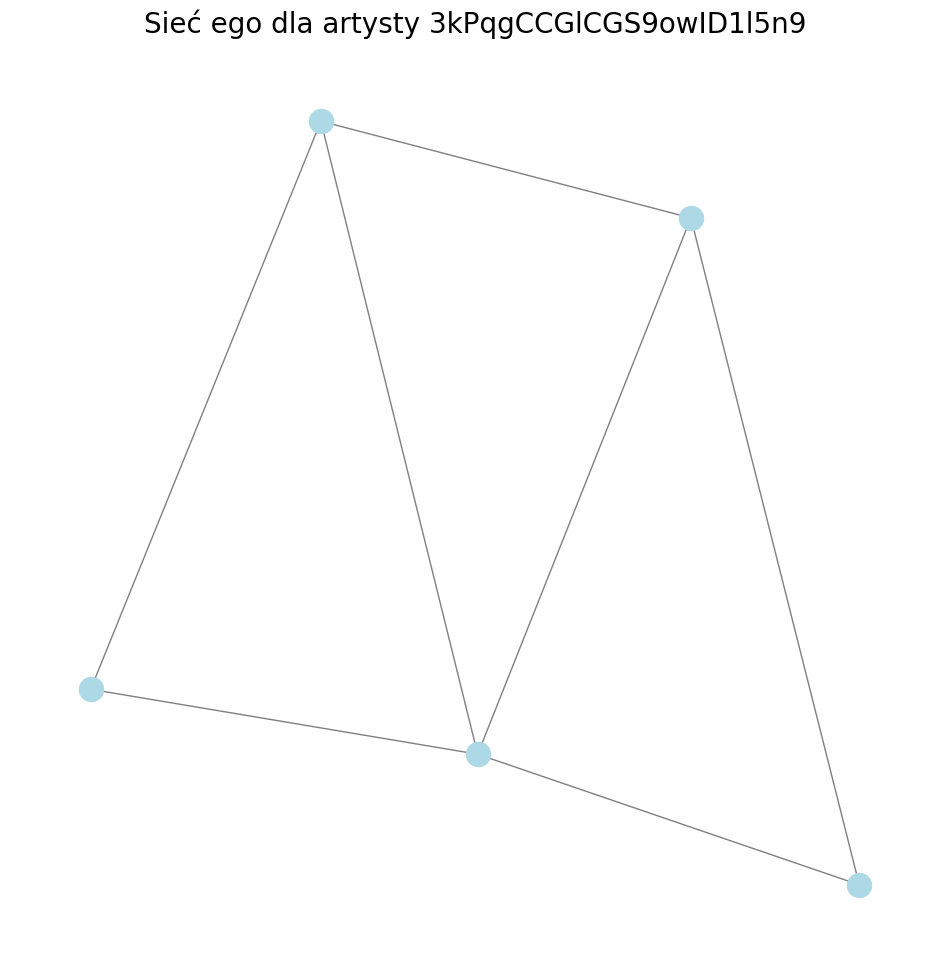

In [12]:
#Sieć Ego - Centralny węzeł - test
# Losowy artysta - test
ego_node = random.choice(nodes['spotify_id'].tolist())

# Budowa sieci ego
ego_graph = nx.ego_graph(G, ego_node, radius=1)

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(ego_graph, seed=42)
nx.draw_networkx_nodes(ego_graph, pos, node_size=300, node_color='lightblue')
nx.draw_networkx_edges(ego_graph, pos, width=1, alpha=0.5)
plt.title(f'Sieć ego dla artysty {ego_node}', size=20)
plt.axis('off')
plt.show()

         Artist  Num_Neighbors  Avg_Popularity_of_Neighbors
0     Bad Bunny            128                        68.41
1         Drake            111                        71.14
2  Taylor Swift             35                        63.49
3    The Weeknd             71                        73.73
4    Kanye West            123                        67.01


C:\Users\szymo\AppData\Local\Temp\ipykernel_10420\1840462743.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Artist', y='Num_Neighbors', data=results_df, palette='pastel')


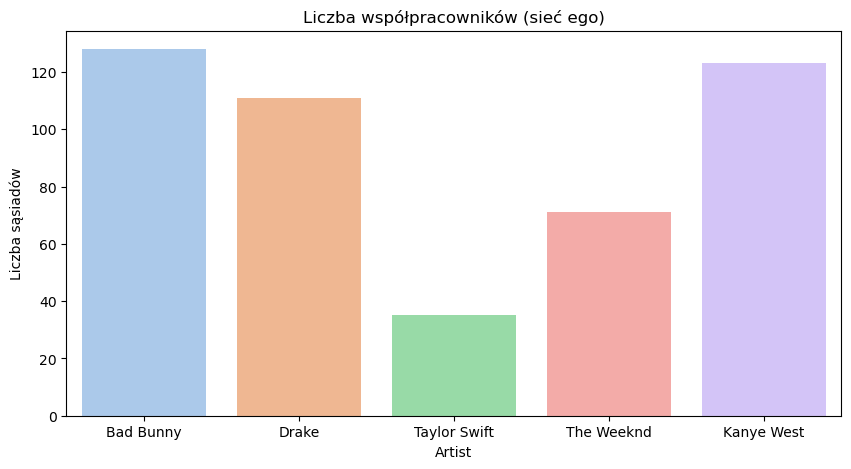

C:\Users\szymo\AppData\Local\Temp\ipykernel_10420\1840462743.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Artist', y='Avg_Popularity_of_Neighbors', data=results_df, palette='pastel')


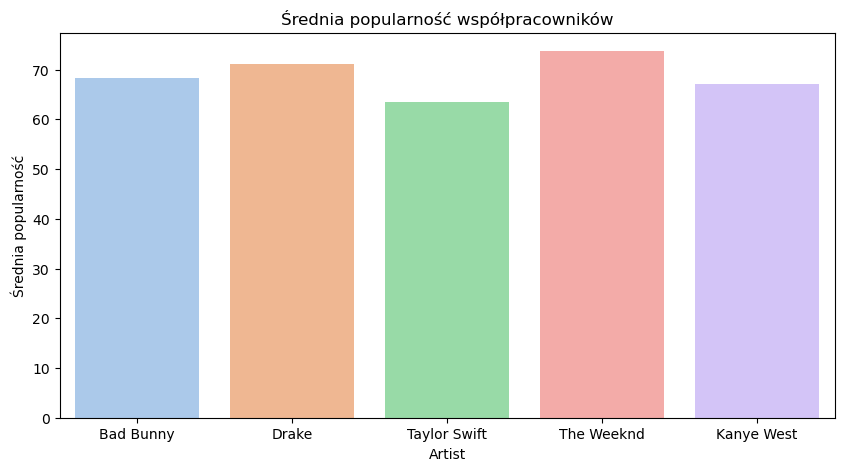

In [13]:

# Lista artystów TOP 5
artist_names = ['Bad Bunny', 'Drake', 'Taylor Swift', 'The Weeknd', 'Kanye West']

# Dane dodatkowe
popularity_dict = dict(zip(nodes['spotify_id'], nodes['popularity']))
followers_dict = dict(zip(nodes['spotify_id'], nodes['followers']))

# Wyniki
results = []

# Pętla po artystach
for name in artist_names:
    # Szukamy ID artysty
    artist_row = nodes[nodes['name'] == name]
    
    if artist_row.empty:
        print(f"Artysta {name} nie znaleziony w danych!")
        continue
    
    artist_id = artist_row['spotify_id'].iloc[0]

    # Budowa ego-graf
    ego_graph = nx.ego_graph(G, artist_id, radius=1)
    
    # Lista sąsiadów (bez centralnego węzła)
    neighbors = list(ego_graph.neighbors(artist_id))
    
    # Liczba sąsiadów (degree centralnego artysty)
    num_neighbors = len(neighbors)
    
    # Średnia popularność sąsiadów
    if neighbors:
        avg_popularity = sum([popularity_dict.get(n, 0) for n in neighbors]) / num_neighbors
    else:
        avg_popularity = 0

    # Sumowanie wyników
    results.append({
        'Artist': name,
        'Num_Neighbors': num_neighbors,
        'Avg_Popularity_of_Neighbors': round(avg_popularity, 2)
    })

# Tabela z wynikami
results_df = pd.DataFrame(results)
print(results_df)

# Wykres porównawczy
plt.figure(figsize=(10, 5))
sns.barplot(x='Artist', y='Num_Neighbors', data=results_df, palette='pastel')
plt.title('Liczba współpracowników (sieć ego)')
plt.ylabel('Liczba sąsiadów')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='Artist', y='Avg_Popularity_of_Neighbors', data=results_df, palette='pastel')
plt.title('Średnia popularność współpracowników')
plt.ylabel('Średnia popularność')
plt.show()

In [ ]:
# W analizowanej piątce artystów Bad Bunny, Drake i Kanye West posiadają najszersze sieci współpracy, liczące ponad 120 współpracowników. 
# Taylor Swift charakteryzuje się znacznie mniejszą liczbą partnerów muzycznych, co potwierdza jej bardziej selektywny i międzygatunkowy charakter współpracy.

# Pod względem średniej popularności współpracowników najwyżej plasuje się The Weeknd, co sugeruje, że jego sieć współpracy oparta jest na artystach o bardzo wysokiej pozycji na rynku muzycznym. 
# Taylor Swift współpracuje z mniejszą liczbą artystów, często reprezentujących szerokie spektrum popularności.

In [14]:
# Funkcja do wyciągania głównego gatunku z list
def extract_main_genre(genre_entry):
    try:
        # Parsujemy listę z tekstu, np. "['pop', 'dance pop']"
        genres = ast.literal_eval(genre_entry)
        if isinstance(genres, list) and len(genres) > 0:
            return genres[0]
        else:
            return 'unknown'
    except:
        return 'unknown'


# Dodanie nowej kolumny main_genre do nodes
nodes['main_genre'] = nodes['genres'].apply(extract_main_genre)

# Tworzenie słownika ID → gatunek
genre_dict = dict(zip(nodes['spotify_id'], nodes['main_genre']))


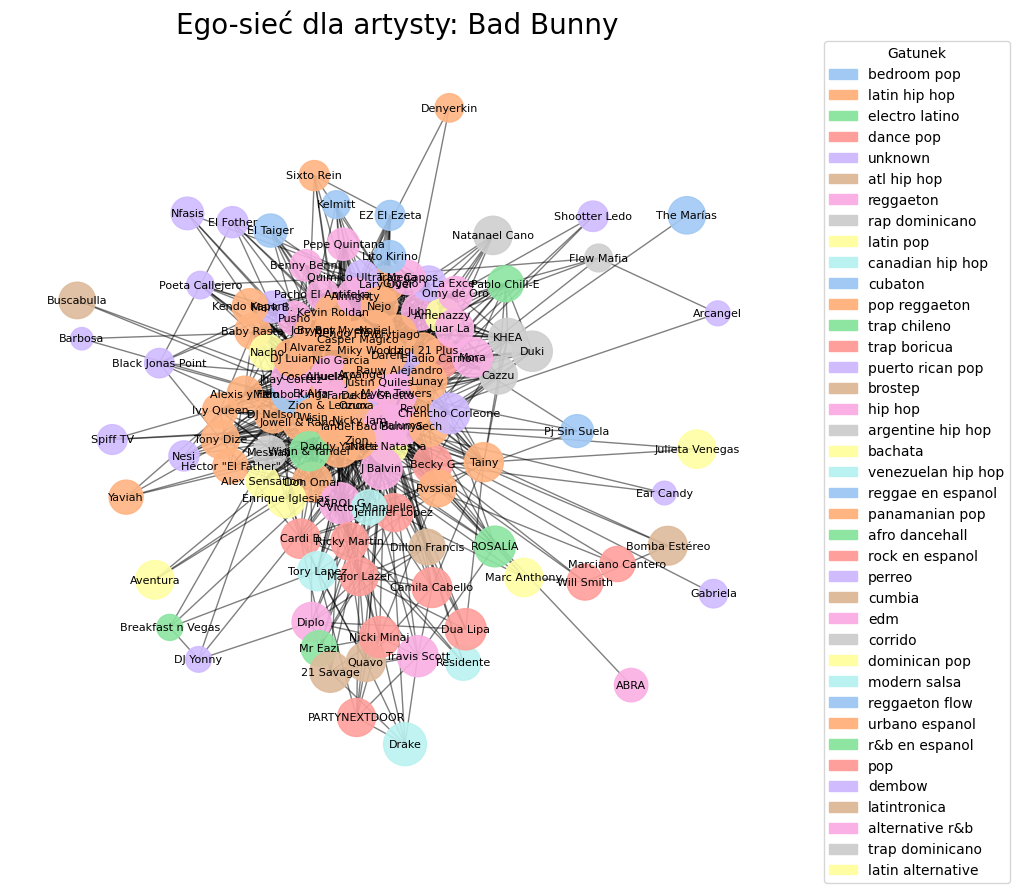

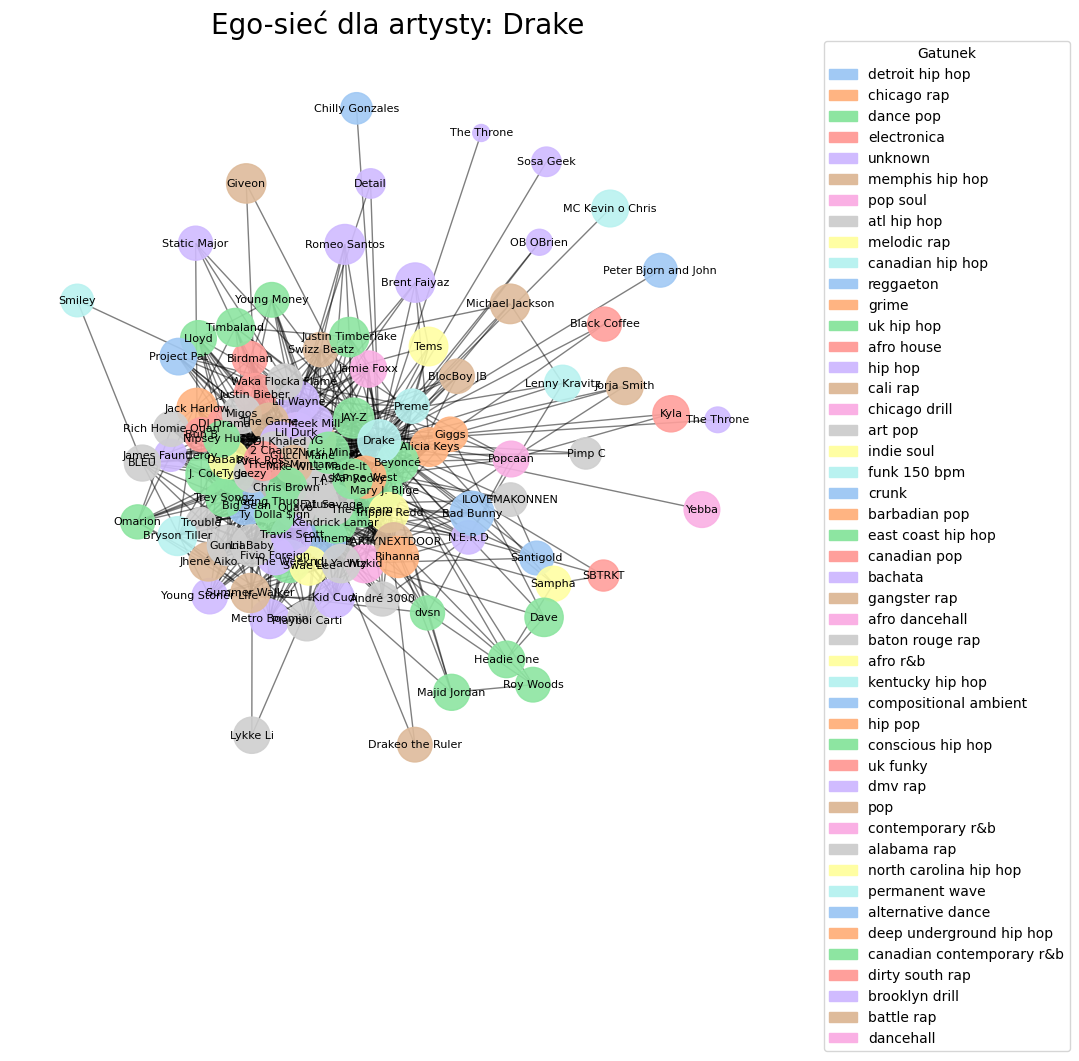

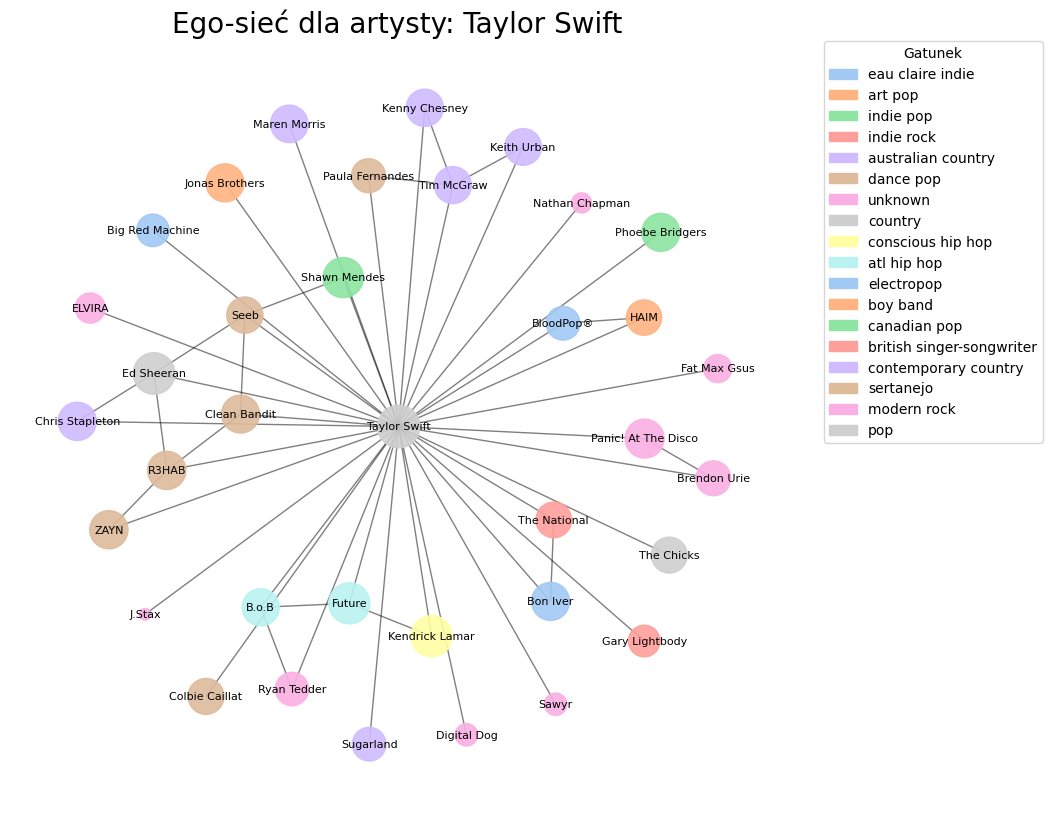

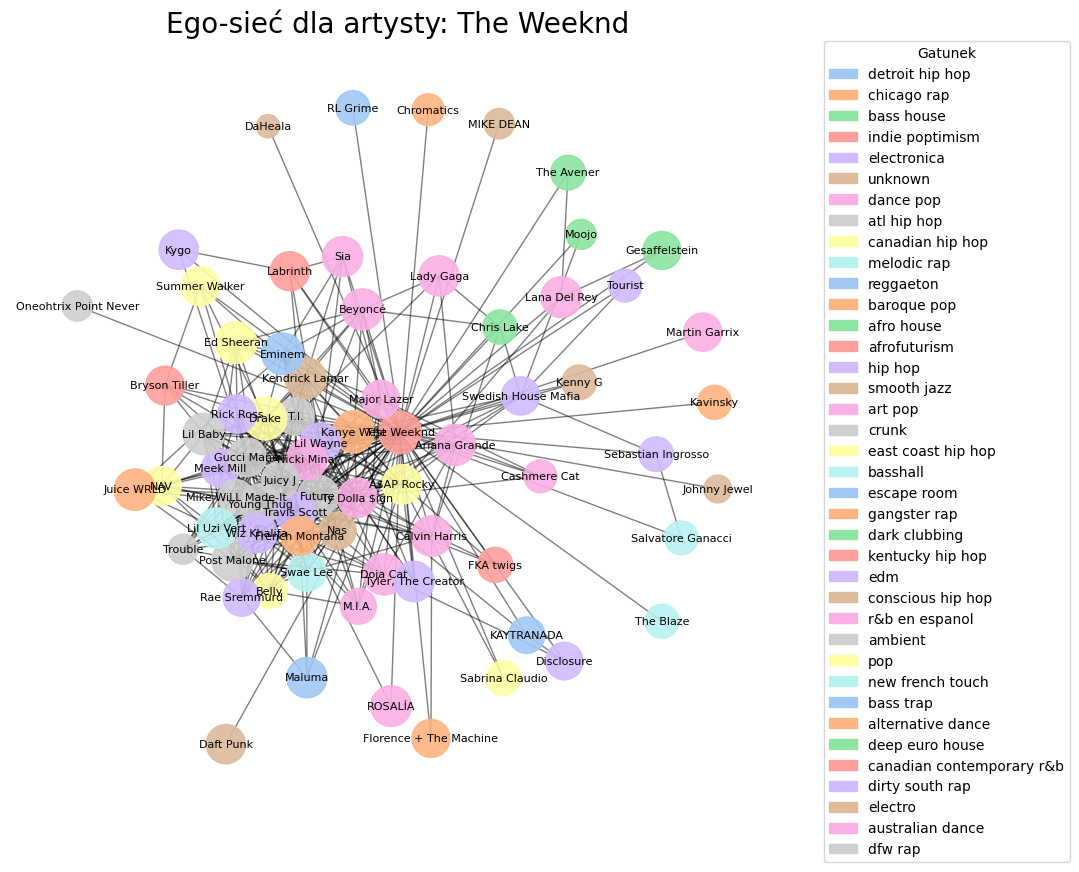

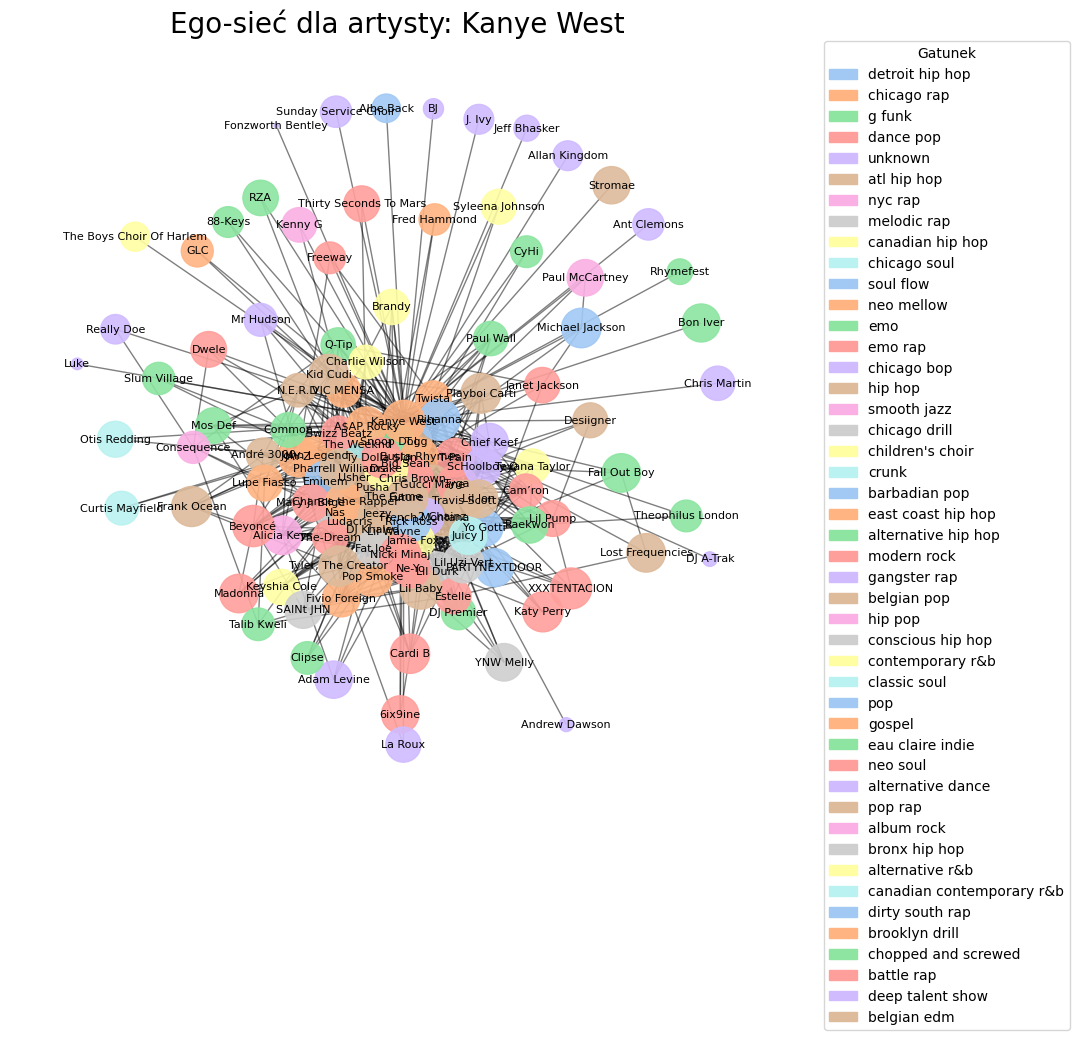

In [15]:
import matplotlib.patches as mpatches

# Pętla dla top 5 ego-grafów
for name in artist_names:
    # ID artysty
    artist_row = nodes[nodes['name'] == name]
    
    if artist_row.empty:
        print(f"Artysta {name} nie znaleziony w danych!")
        continue
    
    artist_id = artist_row['spotify_id'].iloc[0]

    # Budowa ego-graf
    ego_graph = nx.ego_graph(G, artist_id, radius=1)
    
    # Dodanie atrybutów węzłów (popularność, followers, gatunek)
    for node in ego_graph.nodes():
        ego_graph.nodes[node]['popularity'] = popularity_dict.get(node, 0)
        ego_graph.nodes[node]['followers'] = followers_dict.get(node, 0)
        ego_graph.nodes[node]['genre'] = genre_dict.get(node, 'unknown')

    # Pozycje węzłów
    pos = nx.spring_layout(ego_graph, seed=42)

    # Rozmiary węzłów wg popularności
    node_sizes = [ego_graph.nodes[n]['popularity'] * 10 for n in ego_graph.nodes()]

    # Lista unikalnych gatunków
    unique_genres = list(set([ego_graph.nodes[n]['genre'] for n in ego_graph.nodes()]))

    # Paleta pastelowa dla unikalnych gatunków
    color_palette = dict(zip(unique_genres, sns.color_palette("pastel", len(unique_genres)).as_hex()))

    # Kolor dla każdego węzła
    node_colors = [color_palette[ego_graph.nodes[n]['genre']] for n in ego_graph.nodes()]

    # Rysowanie grafu
    plt.figure(figsize=(10, 10))
    nx.draw_networkx_nodes(ego_graph, pos, node_size=node_sizes, node_color=node_colors, alpha=0.9)
    nx.draw_networkx_edges(ego_graph, pos, width=1, alpha=0.5)

    labels = {node: nodes.loc[nodes['spotify_id'] == node, 'name'].values[0] for node in ego_graph.nodes() if node in nodes['spotify_id'].values}
    nx.draw_networkx_labels(ego_graph, pos, labels=labels, font_size=8)

    plt.title(f'Ego-sieć dla artysty: {name}', fontsize=20)
    plt.axis('off')
    
    # Dodajemy LEGENDĘ:
    handles = [mpatches.Patch(color=color_palette[genre], label=genre) for genre in color_palette]
    plt.legend(handles=handles, title="Gatunek", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()



In [16]:
# Analiza sieci ego pokazuje wyraźne różnice w stylu współpracy tych artystów. 
# Bad Bunny posiada bardzo gęstą i zwartą sieć współprac, typową dla środowiskowych scen takich jak reggaeton i latin trap, gdzie wielu artystów współpracuje między sobą. 
# Taylor Swift tworzy natomiast sieć o strukturze gwiaździstej, budując pojedyncze współprace z różnymi artystami z wielu gatunków (pop, country, rap), natomiast jej współpracownicy rzadko współpracują między sobą. 
# Drake oraz The Weeknd pokazują bardzo szerokie sieci ego, w których widać zarówno bezpośrednich współpracowników, jak i liczne połączenia między nimi — szczególnie w obrębie sceny R&B, hip-hopu i popu. 
# Kanye West wyróżnia się wyjątkowo rozbudowaną, wręcz "eksplodującą" strukturą, w której widać silne powiązania między całym środowiskiem rapowym, producenckim i eksperymentalnym, często także z wpływami muzyki pop, soul i elektroniki. 
# W efekcie sieć Kanye Westa jest jedną z najbardziej centralnych i rozgałęzionych w całej analizie.

In [17]:
# Sieć Globalna
# Liczba węzłów i krawędzi
print(f"Liczba artystów (węzłów): {G.number_of_nodes()}")
print(f"Liczba współprac (krawędzi): {G.number_of_edges()}")


Liczba artystów (węzłów): 153327
Liczba współprac (krawędzi): 300386


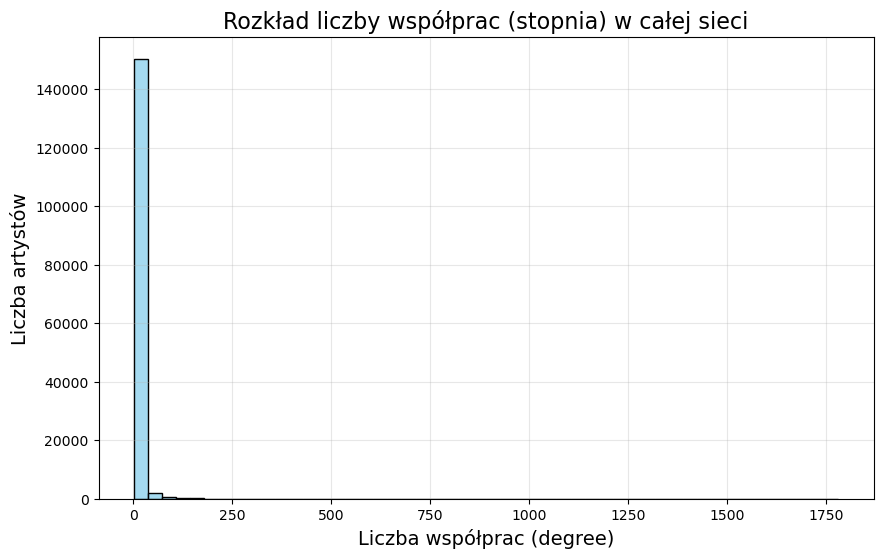

In [32]:
# Rozkład stopni węzłów
degrees = [val for (node, val) in G.degree()]

plt.figure(figsize=(10,6))
sns.histplot(degrees, bins=50, kde=False, color='skyblue')
plt.title('Rozkład liczby współprac (stopnia) w całej sieci', fontsize=16)
plt.xlabel('Liczba współprac (degree)', fontsize=14)
plt.ylabel('Liczba artystów', fontsize=14)
plt.grid(alpha=0.3)
plt.show()


In [ ]:
# Rozkład liczby współprac pokazuje, że ogromna większość artystów na Spotify posiada niewielką liczbę współprac (do kilku partnerów) 
# Niewielka grupa centralnych artystów posiada dziesiątki lub setki współprac, co sugeruje strukturę typu "skala-free network" z wyraźnymi węzłami hubowymi dominującymi w sieci.

In [34]:
# Degree centrality
degree_centrality = nx.degree_centrality(G)

# Posortowanie top 5 artystów
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

# Wyniki
df_top = pd.DataFrame(top_degree, columns=['spotify_id', 'degree_centrality'])
df_top = df_top.merge(nodes[['spotify_id','name']], how='left', on='spotify_id')

print("Top 10 najbardziej centralnych artystów w całej sieci:")
print(df_top[['name', 'degree_centrality']])


Top 10 najbardziej centralnych artystów w całej sieci:
                    name  degree_centrality
0  Johann Sebastian Bach           0.011616
1            Traditional           0.008942
2                  Mc Gw           0.005596
3                  MC MN           0.004122
4          Jean Sibelius           0.003783


In [36]:
pip install python-louvain


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9402 sha256=042979ad71879a5e5f72fff1e67c8117965077d12518663bdee86fdc2d8e2746
  Stored in directory: c:\users\szymo\appdata\local\pip\cache\wheels\40\f1\e3\485b698c520fa0baee1d07897abc7b8d6479b7d199ce96f4af
Successfully built python-louvain
Note: you may need to restart the kernel to use updated packages.


In [38]:
import community as community_louvain

# Detekcja społeczności
partition = community_louvain.best_partition(G)

# Modularność sieci
modularity = community_louvain.modularity(partition, G)

print(f"Modularność sieci: {round(modularity, 4)}")

# Ilość grup
num_communities = len(set(partition.values()))
print(f"Liczba wykrytych społeczności: {num_communities}")


Modularność sieci: 0.8288
Liczba wykrytych społeczności: 1454


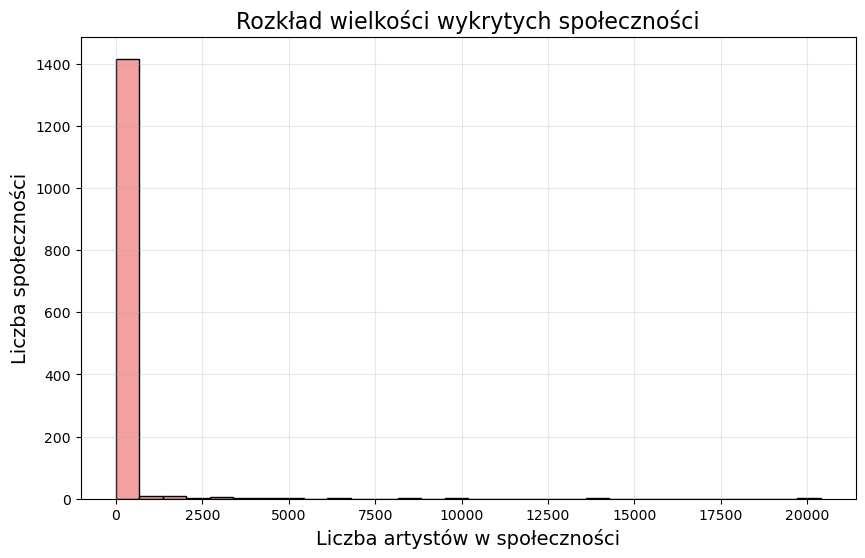

In [40]:
from collections import Counter

community_sizes = Counter(partition.values())

plt.figure(figsize=(10,6))
sns.histplot(list(community_sizes.values()), bins=30, color='lightcoral')
plt.title('Rozkład wielkości wykrytych społeczności', fontsize=16)
plt.xlabel('Liczba artystów w społeczności', fontsize=14)
plt.ylabel('Liczba społeczności', fontsize=14)
plt.grid(alpha=0.3)
plt.show()


In [ ]:
# Wykryta struktura społeczności pokazuje, że zdecydowana większość wykrytych grup jest bardzo mała (licząca kilku lub kilkunastu artystów) 
# Istnieje niewielka liczba dużych społeczności skupiających nawet kilkanaście tysięcy artystów, co sugeruje obecność zarówno niszowych mikrogrup, jak i kilku dużych, dominujących środowisk muzycznych w globalnej sieci współpracy.

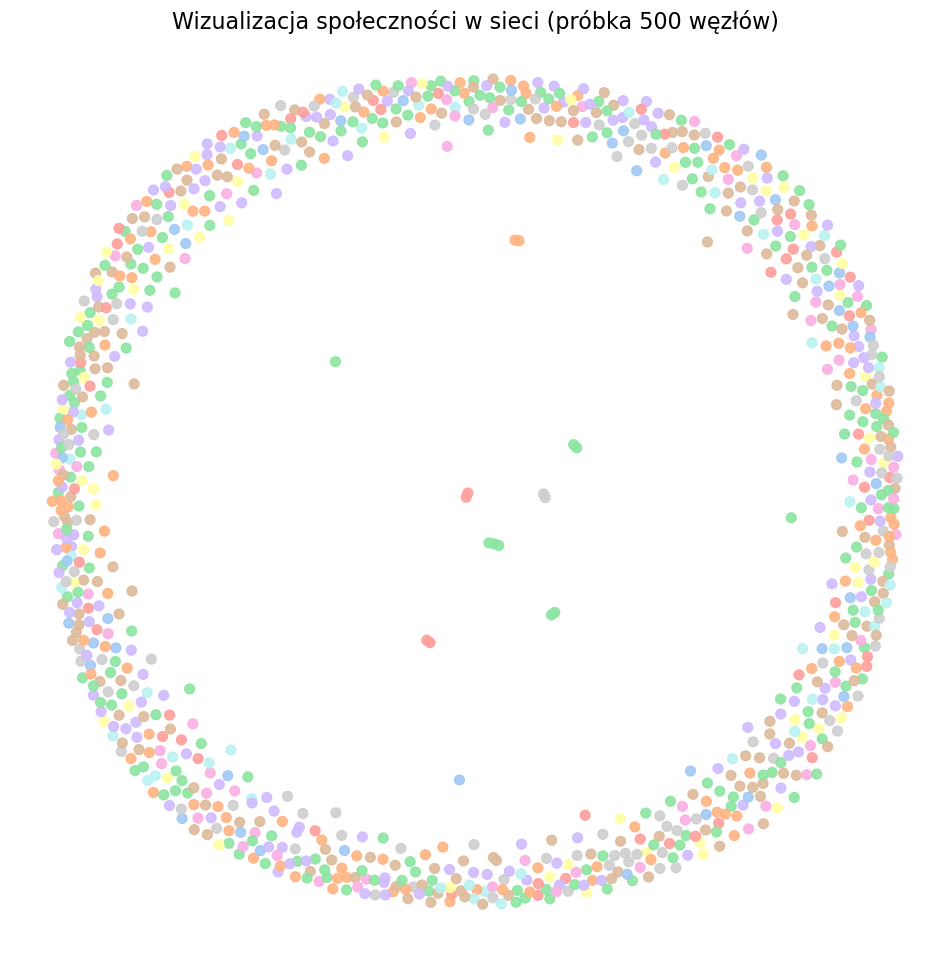

In [48]:
import random

# Próbka 1000 losowych węzłów do rysowania
sample_nodes = random.sample(list(G.nodes()), 1000)
subgraph = G.subgraph(sample_nodes)

# Przypisane społeczności
subgraph_partition = {node: partition[node] for node in subgraph.nodes()}

# Unikalne społeczności
unique_communities = list(set(subgraph_partition.values()))

# Kolorki
color_palette = dict(zip(unique_communities, sns.color_palette("pastel", len(unique_communities)).as_hex()))

# Kolory węzłów do rysowania
node_colors = [color_palette[subgraph_partition[n]] for n in subgraph.nodes()]

# Rysowanie
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(subgraph, seed=42)
nx.draw_networkx_nodes(subgraph, pos, node_color=node_colors, node_size=50, alpha=0.9)
nx.draw_networkx_edges(subgraph, pos, width=0.5, alpha=0.5)
plt.title('Wizualizacja społeczności w sieci (próbka 1000 węzłów)', fontsize=16)
plt.axis('off')
plt.show()


In [ ]:
# W analizie próby 1000 artystów sieć społecznościowa ujawnia istnienie licznych, wyraźnie wydzielonych społeczności muzycznych. 
# W tym duża liczba kolorów wskazuje na dużą różnorodność stylistyczną oraz relatywnie równomierny podział artystów na grupy gatunkowe.